In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
from sklearn.datasets import fetch_openml
import numpy as np
import math

In [26]:
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [27]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


In [28]:
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [30]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)


In [31]:
some_digit_image.shape

(28, 28)

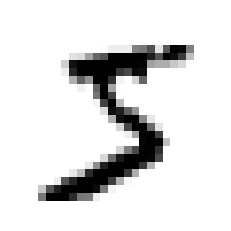

In [32]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [36]:
5 // 4, 5 % 4, 11 // 4, 11 % 4

(1, 1, 2, 3)

In [65]:
size = 20
subplot_number = math.ceil(np.sqrt(size))
subplot_number

5

IndexError: index 5 is out of bounds for axis 0 with size 5

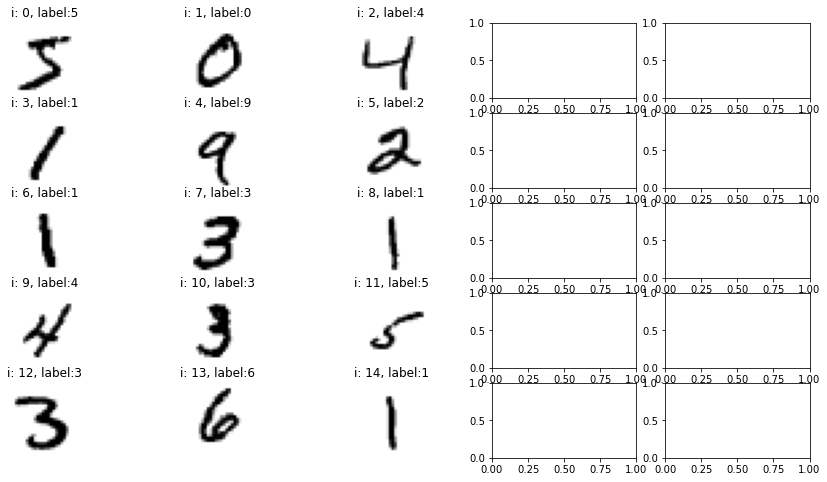

In [66]:


fig, axs = plt.subplots(subplot_number,subplot_number,figsize=(15,8))
#fig.figsize(16, 8)
for i in range(size):
    some_digit = X[i]
    i_ix = i // 3 
    j_ix = i % 3
    
    some_digit_image = some_digit.reshape(28,28)
    axs[i_ix, j_ix].imshow(some_digit_image, cmap="binary",)
    axs[i_ix, j_ix].axis("off")
    axs[i_ix, j_ix].title.set_text(f"i: {i}, label:{y[i]}")
    
    #axs[i_ix, i_ix].show()

In [22]:
y = y.astype(np.uint8)

# Split Train and Test 

In [23]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
np.